In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

In [9]:
users = pd.read_csv('movielens/users.dat', header=None, sep='::', names=['user_id', 'gender', 'age', 'occupation', 'zip'])
users

<ipython-input-9-3dd7fef720ba>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('movielens/users.dat', header=None, sep='::', names=['user_id', 'gender', 'age', 'occupation', 'zip'])


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [10]:
movies = pd.read_csv('movielens/movies.dat', header=None, sep='::', names=['movie_id', 'title', 'genres'])
movies

<ipython-input-10-df7d8d5af0f4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('movielens/movies.dat', header=None, sep='::', names=['movie_id', 'title', 'genres'])


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [13]:
ratings = pd.read_csv('movielens/ratings.dat', header=None, sep='::', names=['user_id', 'movie_id', 'ratings', 'timestamp'])
ratings

<ipython-input-13-404e7445a60b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('movielens/ratings.dat', header=None, sep='::', names=['user_id', 'movie_id', 'ratings', 'timestamp'])


,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [14]:
users['gender'].unique()

array(['F', 'M'], dtype=object)

In [15]:
ratings['ratings'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: ratings, dtype: int64

In [19]:
ratings['movie_id'].value_counts()
print(movies[movies['movie_id'] == 2858])

      movie_id                   title        genres
2789      2858  American Beauty (1999)  Comedy|Drama


In [21]:
data = pd.merge(pd.merge(ratings, movies), users)
data

,user_id,movie_id,ratings,timestamp,title,genres,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


In [31]:
# popular films are those who have got number of people giving ratings, more than 500
s1 = data['title'].value_counts()
s2 = s1[s1 > 500]
popular_film_titles = s2.index
popular_film_titles

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Ice Storm, The (1997)', 'Ordinary People (1980)', 'Halloween (1978)',
       'Peggy Sue Got Married (1986)', '28 Days (2000)', 'Body Heat (1981)',
       'Alien Nation (1988)', 'Guns of Navarone, The (1961)',
       'Postino, Il (The Postman) (1994)', 'Emma (1996)'],
      dtype='object', length=617)

In [32]:
d1 = data[['title', 'ratings', 'gender']]
d1

,title,ratings,gender
0,One Flew Over the Cuckoo's Nest (1975),5,F
1,James and the Giant Peach (1996),3,F
2,My Fair Lady (1964),3,F
3,Erin Brockovich (2000),4,F
4,"Bug's Life, A (1998)",5,F
...,...,...,...
1000204,Footloose (1984),2,M
1000205,MacKenna's Gold (1969),3,M
1000206,Pumpkinhead (1988),4,M
1000207,Missing in Action (1984),2,M


In [33]:
d2 = d1.pivot_table('ratings', aggfunc='mean', index='title', columns=['gender'])
d2

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [34]:
d3 = d2.loc[popular_film_titles]
d3

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
Body Heat (1981),3.943925,4.055416
Alien Nation (1988),3.433333,3.195946
"Guns of Navarone, The (1961)",4.061224,3.953642
"Postino, Il (The Postman) (1994)",4.125628,4.072848


In [46]:
# top 10 films loved by females
d4 = d3.sort_values(by='F', ascending=False).head(10)
del d4['M']
d4

gender,F
"Close Shave, A (1995)",4.644444
"Wrong Trousers, The (1993)",4.588235
Schindler's List (1993),4.562602
"Shawshank Redemption, The (1994)",4.539075
To Kill a Mockingbird (1962),4.536667
"Usual Suspects, The (1995)",4.513317
Rear Window (1954),4.484536
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132
"Sixth Sense, The (1999)",4.477410
Some Like It Hot (1959),4.462745


In [49]:
# top 10 films loved by males
d5 = d3.sort_values(by='M', ascending=False).head(10)
del d5['F']
d5

gender,M
"Godfather, The (1972)",4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.576628
"Shawshank Redemption, The (1994)",4.560625
Raiders of the Lost Ark (1981),4.520597
"Usual Suspects, The (1995)",4.518248
Star Wars: Episode IV - A New Hope (1977),4.495307
Schindler's List (1993),4.491415
"Wrong Trousers, The (1993)",4.478261
"Close Shave, A (1995)",4.473795
Rear Window (1954),4.472991


<AxesSubplot:>

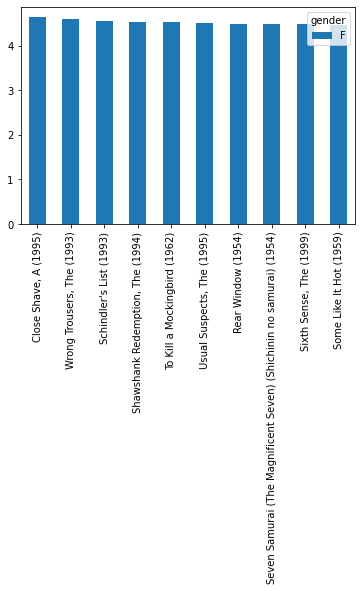

In [48]:
d4.plot(kind='bar')

<AxesSubplot:>

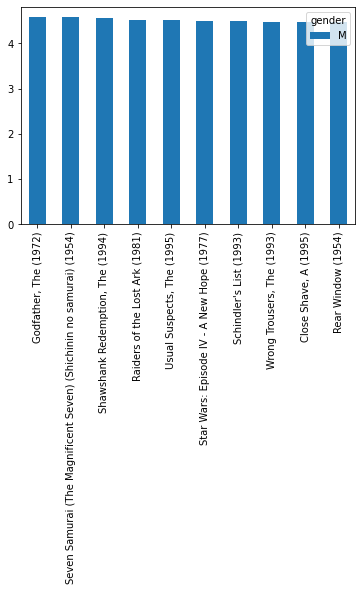

In [51]:
d5.plot(kind='bar')

In [52]:
# top 10 films that had the maximum disagreement factor
d3

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
Body Heat (1981),3.943925,4.055416
Alien Nation (1988),3.433333,3.195946
"Guns of Navarone, The (1961)",4.061224,3.953642
"Postino, Il (The Postman) (1994)",4.125628,4.072848


In [54]:
d6 = d3.copy()
d6['diff'] = d6['F'] - d6['M']
d6['diff'] = d6['diff'].abs()
d6

gender,F,M,diff
American Beauty (1999),4.238901,4.347301,0.108400
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,0.192371
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,0.238096
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058,0.203821
Jurassic Park (1993),3.579407,3.814197,0.234791
...,...,...,...
Body Heat (1981),3.943925,4.055416,0.111490
Alien Nation (1988),3.433333,3.195946,0.237387
"Guns of Navarone, The (1961)",4.061224,3.953642,0.107582
"Postino, Il (The Postman) (1994)",4.125628,4.072848,0.052780


In [56]:
d7 = d6.sort_values(by='diff', ascending=False).head(10)
d7

gender,F,M,diff
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
Grease (1978),3.975265,3.367041,0.608224
Caddyshack (1980),3.396135,3.969737,0.573602
Animal House (1978),3.628906,4.167192,0.538286
"Exorcist, The (1973)",3.537634,4.067239,0.529605
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885
Big Trouble in Little China (1986),2.987952,3.485030,0.497078


In [57]:
d8 = d7.copy()
del d8['diff']
d8

gender,F,M
Dirty Dancing (1987),3.790378,2.959596
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300
Dumb & Dumber (1994),2.697987,3.336595
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283
Grease (1978),3.975265,3.367041
Caddyshack (1980),3.396135,3.969737
Animal House (1978),3.628906,4.167192
"Exorcist, The (1973)",3.537634,4.067239
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131
Big Trouble in Little China (1986),2.987952,3.485030


<AxesSubplot:>

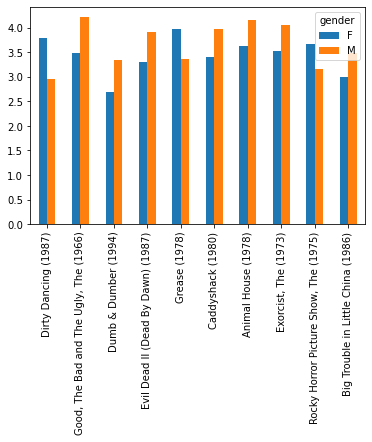

In [58]:
d8.plot(kind='bar')